Nama: Phoebe Patricia Wibowo <br>
NIM: 2602080825

In [51]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import accuracy_score
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [52]:
#masukan csv ke dalam dataframe
df = pd.read_csv(r"C:\Users\phoebe\Documents\Semester_4\UAS_Model Deployment\data_1D (1).csv")
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


Dataframe Overview

In [53]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8238 non-null   int64  
 1   age          8238 non-null   int64  
 2   job          8230 non-null   object 
 3   marital      8238 non-null   object 
 4   education    8238 non-null   object 
 5   default      8238 non-null   object 
 6   housing      8238 non-null   object 
 7   loan         8238 non-null   object 
 8   contact      8238 non-null   object 
 9   month        8238 non-null   object 
 10  day_of_week  8238 non-null   object 
 11  duration     8226 non-null   float64
 12  campaign     8238 non-null   int64  
 13  pdays        8238 non-null   int64  
 14  previous     8238 non-null   int64  
 15  poutcome     8238 non-null   object 
 16  y            8238 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


kita tidak mengisi null value akibat menggunakan one hot encoding, kita bisa gunakan untuk prediksi secara langsung 

In [55]:
#melihat unique values untuk prediction constraint
string_columns = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

for i in string_columns:
    print(i,": ")
    print(df[i].unique())


job : 
['retired' 'services' 'admin.' 'management' 'technician' 'blue-collar'
 'housemaid' 'self-employed' 'entrepreneur' 'unknown' 'student'
 'unemployed' nan]
marital : 
['divorced' 'married' 'single' 'unknown']
education : 
['basic.4y' 'high.school' 'university.degree' 'professional.course'
 'basic.9y' 'unknown' 'basic.6y' 'illiterate']
contact : 
['cellular' 'telephone']
month : 
['nov' 'may' 'aug' 'jul' 'apr' 'jun' 'sep' 'oct' 'mar' 'dec']
day_of_week : 
['tue' 'wed' 'thu' 'mon' 'fri']
poutcome : 
['success' 'nonexistent' 'failure']


In [56]:
#ngedrop column pertama karena tidak ada influensi pada data dan ini index 
data = df.drop("Unnamed: 0",axis=1 )
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


Identifikasi outlier

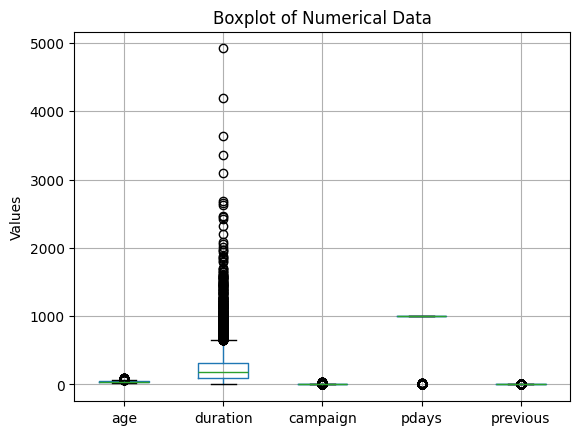

In [57]:
data[['age', 'duration', 'campaign', 'pdays', 'previous']].boxplot()

# Add title and labels
plt.title('Boxplot of Numerical Data')
plt.ylabel('Values')

# Show plot
plt.show()

Splitting train dan test data

In [58]:
x = data.drop('y', axis=1)  # Features
y = data['y']  # Target variable

# Split data into training dan test split 80% dan 20% 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Train Shape: ",x_train.shape)
print("Test Shape: ",x_test.shape)

Train Shape:  (6590, 15)
Test Shape:  (1648, 15)


In [59]:
train = pd.concat([x_train, y_train], axis=1)
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
3805,31,blue-collar,single,basic.9y,no,yes,yes,cellular,jun,tue,103.0,1,3,2,success,yes
5900,32,technician,married,professional.course,no,no,yes,cellular,jul,wed,183.0,1,999,0,nonexistent,no
5022,47,technician,married,professional.course,no,yes,yes,cellular,aug,fri,78.0,3,999,0,nonexistent,no
4556,36,admin.,single,university.degree,no,yes,no,cellular,jul,thu,10.0,3,999,0,nonexistent,no
4139,45,management,married,university.degree,no,no,yes,cellular,nov,wed,391.0,2,999,0,nonexistent,no


Melakukan one hot encoding ke dalam train dan test

In [60]:
ohe = OneHotEncoder(handle_unknown='ignore')

#one hot encoder ke dalam train dataframe dengan ngefit dan transform
train_encoded = pd.DataFrame(ohe.fit_transform(train[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]).toarray(), columns=ohe.get_feature_names_out())

#menggabung encoded dan original column 
train_encoded = pd.concat([train.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], axis=1), train_encoded], axis=1)

train_encoded.head()

,age,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
3805,31.0,103.0,1.0,3.0,2.0,yes,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5900,32.0,183.0,1.0,999.0,0.0,no,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5022,47.0,78.0,3.0,999.0,0.0,no,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4556,36.0,10.0,3.0,999.0,0.0,no,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4139,45.0,391.0,2.0,999.0,0.0,no,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [61]:
test = pd.concat([x_test, y_test], axis=1)
test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
706,46,admin.,divorced,university.degree,unknown,no,no,telephone,may,wed,93.0,1,999,0,nonexistent,no
5968,35,technician,married,high.school,unknown,yes,no,cellular,jul,tue,740.0,1,999,0,nonexistent,yes
1665,24,services,single,high.school,no,yes,no,cellular,jul,wed,242.0,1,999,0,nonexistent,no
6676,51,admin.,married,high.school,no,no,no,cellular,may,tue,40.0,4,999,0,nonexistent,no
5606,36,admin.,married,high.school,no,yes,no,telephone,jul,tue,305.0,7,999,0,nonexistent,no


In [62]:
#one hot encoder ke dalam test dataframe dengan ngefit dan transform
test_encoded = pd.DataFrame(ohe.transform(test[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]).toarray(), columns=ohe.get_feature_names_out())

#menggabung encoded dan original column 
test = pd.concat([test.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], axis=1), test_encoded], axis=1)
test_encoded = test
test_encoded.head()

,age,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
706,46.0,93.0,1.0,999.0,0.0,no,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5968,35.0,740.0,1.0,999.0,0.0,yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665,24.0,242.0,1.0,999.0,0.0,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6676,51.0,40.0,4.0,999.0,0.0,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5606,36.0,305.0,7.0,999.0,0.0,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Melihat dataframe test 

In [63]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2955 entries, 706 to 1647
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1648 non-null   float64
 1   duration                       1645 non-null   float64
 2   campaign                       1648 non-null   float64
 3   pdays                          1648 non-null   float64
 4   previous                       1648 non-null   float64
 5   y                              1648 non-null   object 
 6   job_admin.                     1648 non-null   float64
 7   job_blue-collar                1648 non-null   float64
 8   job_entrepreneur               1648 non-null   float64
 9   job_housemaid                  1648 non-null   float64
 10  job_management                 1648 non-null   float64
 11  job_retired                    1648 non-null   float64
 12  job_self-employed              1648 non-null   floa

Remove outliers dalam train dataframe

In [64]:
#Mengganti variabel untuk predition
train_no = train_encoded
test_no = test_encoded

In [65]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Removing outliers untuk kolom numerik di train
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
for col in numerical_columns:
    train_no = remove_outliers(train_no, col)

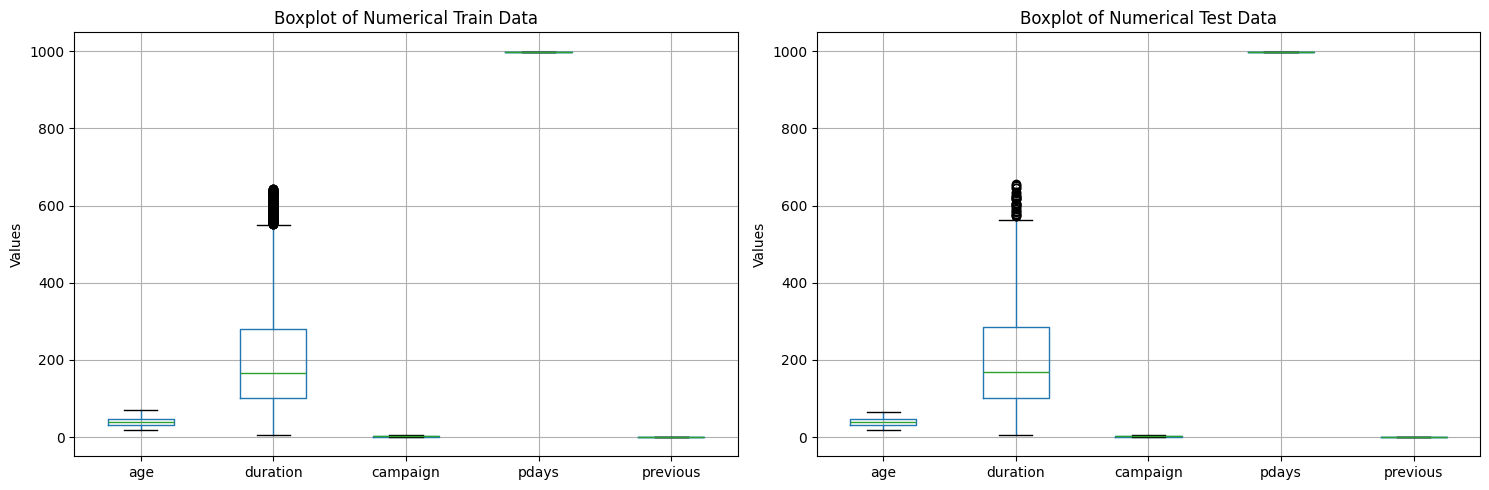

In [66]:
#Ngelihat outlier train dan test data 
plt.figure(figsize=(15, 5))  

# Subplot 1: Train Data
plt.subplot(1, 2, 1)
train_no[['age', 'duration', 'campaign', 'pdays', 'previous']].boxplot()
plt.title('Boxplot of Numerical Train Data')
plt.ylabel('Values')

# Subplot 2: Test Data
plt.subplot(1, 2, 2)
test_no[['age', 'duration', 'campaign', 'pdays', 'previous']].boxplot()
plt.title('Boxplot of Numerical Test Data')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [67]:
#Melihat shape untuk menyocokan column test dan train 
x_train = train_no.drop('y', axis=1)  # Features
y_train = train_no['y']  # Target variable
x_test = test_no.drop('y', axis=1)  # Features
y_test = test_no['y']  # Target variable
print(x_train.shape)
print(x_test.shape)

(4928, 58)
(1204, 58)


In [68]:
# Fill null values with median 
x_train = x_train.fillna(x_train.median())
x_test = x_test.fillna(x_test.median())

# Random forest

In [69]:

rf_classifier = RandomForestClassifier(n_estimators=1000,criterion='gini',random_state=42)


rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_train_rf = accuracy_score(y_test, y_pred_rf)


print(f"Accuracy with x_train: {accuracy_train_rf*100}%")

Accuracy with x_train: 91.69435215946844%


# Decision Tree Classifier

In [70]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)
y_pred_dec_tree = dec_tree.predict(x_test)
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
print(f"Decision Tree Accuracy: {100* accuracy_dec_tree:.2f} %")

Decision Tree Accuracy: 90.37 %


# K - Nearest neighbours

In [71]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {100* accuracy_knn:.2f} %")

K-Nearest Neighbors Accuracy: 92.69 %


# Decision Tree

In [72]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)
y_pred_dec_tree = dec_tree.predict(x_test)
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
print(f"Decision Tree Accuracy: {100* accuracy_dec_tree:.2f} %")

Decision Tree Accuracy: 90.20 %


Model terbaik yang ada yaitu K Nearest Neighbout dengan akurasi 92.69% maka akan kita masukan model ini ke dalam pickle

In [73]:
#masuk model dalam pickle 
model_path = "model.pkl"
with open(model_path, "wb") as file:
    pickle.dump(knn, file)

In [74]:
#memasukan encoder ke dalam pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(ohe, f)

# Menyiapkan requirements.txt

In [75]:
#Melihat indenpendency untuk dimasukan ke requriements.txt 
!pip freeze

absl-py==2.1.0
ace_tools==0.0
altair==5.3.0
annotated-types==0.6.0
anyio==4.3.0
asttokens==2.4.1
astunparse==1.6.3
attrs==23.2.0
beautifulsoup4==4.12.3
bio==1.7.0
biopython==1.83
bioseq==0.2.3
biothings-client==0.3.1
bleach==6.1.0
blinker==1.7.0
build==1.2.1
cachetools==5.3.3
certifi==2024.2.2
charset-normalizer==3.3.2
click==8.1.7
colorama==0.4.6
comm==0.2.2
contourpy==1.2.0
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
defusedxml==0.7.1
dnspython==2.6.1
email_validator==2.1.1
et-xmlfile==1.1.0
executing==2.0.1
fastapi==0.111.0
fastapi-cli==0.0.3
fastjsonschema==2.19.1
filelock==3.15.4
flatbuffers==24.3.25
fonttools==4.50.0
fsspec==2024.6.1
future==1.0.0
gast==0.5.4
gitdb==4.0.11
GitPython==3.1.43
google-pasta==0.2.0
gprofiler-official==1.0.0
grpcio==1.62.1
h11==0.14.0
h5py==3.10.0
httpcore==1.0.5
httptools==0.6.1
httpx==0.27.0
huggingface-hub==0.22.2
idna==3.6
imageio==2.34.1
imbalanced-learn==0.12.2
imblearn==0.0
intel-openmp==2021.4.0
ipykernel==6.29.3
ipython==8.22.2
jedi==0.19.1